In [1]:
"""
For convenience, we summarize all imported Python modules in this block.
"""
# To handle data
import numpy as np
# To access the learning model
from sklearn import linear_model
# To plot figures
import matplotlib.pyplot as plt

# Linear Models

## <a name="sec:a_simple_problem" />1. A Simple Problem
Let's start with a simple and straightforward learning problem:
 - **Given**: A training set $T = \{(1, 2), (3, 4)\}$ consisting of two pairs of numbers. Each pair has the format $(x_i, y_i)$, where $x_i \in \mathbb{R}$ is the data and $y_i \in \mathbb{R}$ is the target value. 
 - **Seek**: A linear function $y = w_1 x + w_0$ s.t. for any new data $x$, the function will output the best target value $y$ for $x$. 

In this problem, the only parameters to be determined are $w_0$ and $w_1$. As you may have learned in high school, $y = w_1 x + w_0$ is a straight line in the 2-D Euclidean plain, where $w_0$ is called the "*intercept*" of the line, and $w_1$ is called the "*slope"* of the line. What we are looking for is such a line that best "*fits*" the training points. We will explain what "*fit*" actually means soon later. 

This linear function with unknown parameter, $f(x) = w_1 x + w_0$ is called a **parameterized function**. $w_0$ and $w_1$ are called **parameters**. Our learning task in this problem with our current settings is to determine the concrete values of $w_0$ and $w_1$. A parameterized function can be understood as a family of functions of the same "format". And, thus, the learning is to choose the most appropriate function from the family. 

## <a name="sec:nbs_hands_on" />2. NBS Hands-On

Let's use *scikit-learn* to solve this learning problem, i.e. obtaining the desired values for $w_0$ and $w_1$. The linear regression model is what we need in this experiment. Please check out the following two links for more details about this model in *scikit-learn*:
- Linear Regression model API: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
- Linear models: https://scikit-learn.org/stable/modules/linear_model.html#

### <a name="sec:train_linear_regression_model" />2.1 Train Linear Regression Model

Our plan is to use `NumPy ndarray` to handle the input data, and then use the linear regression model provided by `scikit-learn` to do the training. Finally, we will show the trained model, and visualize the model as well as the training data to see if it actually works. 

The data and the target values in the training dataset are placed into two separate `ndarray`'s, named `X` and `Y` respectively. In many popular machine learning libraries, this is a "standard" organization of training data.

In [2]:
# Construct data structures for data (X) and target values (Y). 
# Both X and Y are NumPy ndarray. 
# Required by scikit-learn, X must be a 2-D array. Each element in this array is a data point represented by an array containing 
# all data attribute values. In our problem, the data only has one attribute. This is why each element in X is 1-dim. 
X = np.asarray([[1], [3]])
Y = np.asarray([2, 4])

print('X = \n', X) 
print('Y = \n', Y)

X = 
 [[1]
 [3]]
Y = 
 [2 4]


We create an instance of the class `LinearRegression` (provided in the package `linear_model`), which is the linear regression model to be learned.

In [3]:
# Train the linear regression model.
# 'fit()' is the high-level API function call for training. When it finishes successfully, the training is done. 
lin_reg = linear_model.LinearRegression().fit(X, Y)
# Obtain the score of the learning quality. 1.0 is the best score, which means the learned model perfectly "fits" the training data.
# Any other scores less than 1.0, which can be negative, indicate the imperfection of fitting the training data. 
# In our case, the score is 1.0, because two points determine a line. 
score = lin_reg.score(X, Y)

print('Performance Score in Training =', score)
# 'coef_' gives all learned parameters for "slope", i.e. all w_i except w_0, the intercept. Don't forget that if our data have more
# attributes (e.g. x_i=[x_0, x_1, X_2]), then the learning algorithm will output more learned parameters.
print('w_1 =', lin_reg.coef_)
# 'intercept_' gives the learned w_0, the intercept. 
print('w_0 =', lin_reg.intercept_)

Performance Score in Training = 1.0
w_1 = [1.]
w_0 = 1.0000000000000004


Up to this point, we have learned $w_0=1.0$ and $w_1=1.0$. And, thus, the learned straight line is $y = x + 1.0$. Now, let's plot the line as well as the training points to visually examine if the line "fits" the training data. 

<a name="fig:2_1_1" /> **Figure 2.1.1** The learned regression line and the training data.

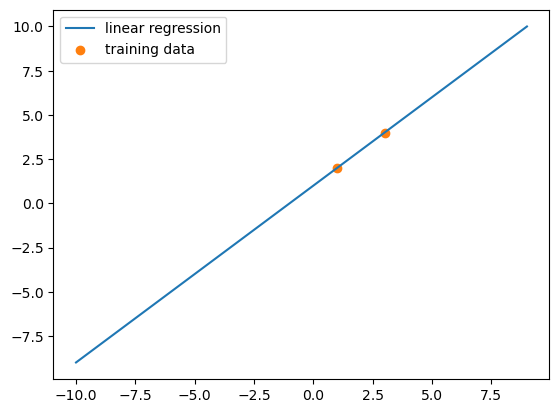

In [4]:
# Create a sample for X to draw the line.
x_samples = [[I] for I in range(-10, 10, 1)]
# Obtain the values of Y corresponding to the sample of X.
y_vals = lin_reg.predict(x_samples)
fig, ax = plt.subplots()
ax.plot(x_samples, y_vals, label='linear regression')
ax.scatter(X.flatten(), Y, label='training data', color='tab:orange')
plt.legend()

As reasonably expected, the learned straight line perfectly "fits" the two training data points, i.e. the two points accurately fall onto the line, because two points establish a line. (Note that we have not formally explained what "fit" means, and it does not mean that ALL training points are required to fall onto the curve of the learned function.)

## <a name="sec:pop_up_the_hood_of_learning" />3. Pop Up the Hood of Learning

In the learning process above, the goal is to determine the most appropriate values of $w_0$ and $w_1$ respectively so that the straight line parameterized by $w_0$ and $w_1$ "fits" the training data. In a typical perspective, determining the values of parameters is an **optimization problem**. More specifically, we are seeking the values of $w_0$ and $w_1$ so that the "fitness" is optimized. In an optimization problem, two primary topics are **objectives** (i.e. what to optimize) and **optimization algorithms** (i.e. how to optimize). 
<!-- Now that we have known the values are in the range $(- \infty, + \infty)$, then, theoretically speaking, it is a plan to go through all possible values in the range and test each value against some specific criteria to identify the ones in desire. To do so, we have to define the criteria beforehand. -->

### <a name="sec:objectives" />3.1 Objectives

Intuitively, the **objective** of a learning problem is a function that measures the quality of the learning progress in some perspectives. Typically, the objective function would need, 1) training data, 2) the model, and 3) candidate values for parameters as input. Then, it outputs a value indicating the quality. The **optimization** over the objective, on the other hand, means an algorithmic procedure that seeks the best model, among all candicates, by optimizing (namely, maximizing or minimizing) the objective. 

The term "**fit**" means that the objective has been optimized as much as possible using the training data. Nonetheless, it's important to note that, even if the returned value of the objective could not be further improved in the current settings (e.g., the choice of model, and the parameters' values if any) of the learning problem, the resulting model may not optimally reflect the true patterns of the data (i.e., may not perfectly fit the data). 

Now, let's take a look at some typical objectives in linear regression. 

### <a name="sec:least_squares_in_linear_regression" />3.2 Least Squares in Linear Regression

**Least squares** is the most popular objective in linear regression. The motivation is to minimize the difference between $y_i$ in the training data and $\hat{y}_i$ predicted by the model. The objective function is as follows:
$$
    s(\vec{\boldsymbol{w}}) = \sum\limits_{(x_i, y_i) \in T} (y_i - \hat{y}_i)^2
$$
where the vector $\vec{\boldsymbol{w}}$ contains all parameters for the model (e.g. in our above example, $\vec{\boldsymbol{w}} = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$), and $T$ is the training data set. In a more mathematical way, this objective is written as:
$$
    \DeclareMathOperator*{\argmin}{arg\,min}
    \argmin\limits_{\vec{\boldsymbol{w}}} \sum\limits_{(x_i, y_i) \in T} (y_i - \hat{y}_i)^2
$$
where "$\argmin\limits_{\boldsymbol{\theta}} f(x;\boldsymbol{\theta})$" means "seeking parameters $\boldsymbol{\theta}$ that minimize the function $f(x; \boldsymbol{\theta})$ parameterized by $\boldsymbol{\theta}$". (Note that conventionally the greek letter $\theta$ is used to denote a parameter, and its bold version $\boldsymbol{\theta}$ is used to denote a vector of parameters instead of using $\vec{\theta}$.)

To train a linear regression model, we need to minimize the Least Square objective function and find concrete values of the parameters $\vec{\boldsymbol{w}}$ in the course of the optimization.

### <a name="sec:optimization_algorithms" />3.3 Optimization Algorithms

An **optimization algorithm** is a programmatic procedure determining the exact or approximate values of desired parameters of a given objective. Typically, the designs of such algorithms follow either (sometimes, both) of the two directions: **analytic** and **searching**. 

**Analytic** methods directly compute solutions, i.e. by outputting a closed form, exactly or approximately, to the problems. And, **searching** methods usually iteratively refine candidate solutions until some terminal conditions are satisfied. 

### <a name="sec:solve_lls_analytically" />3.4 Solve Linear Least Squares Analytically
In our above example, it has already known that $\hat{y}_i = w_0 + w_1 x_i$, and thus the objective to be minimized is rewritten as: 
$$
    s \Big(\begin{bmatrix} w_0 \\ w_1 \end{bmatrix} \Big) = \Big(y_1 - (w_0 + w_1 x_1)\Big)^2 + \Big(y_2 - (w_0 + w_1 x_2)\Big)^2
$$
This formula can also be written in a matrix form:
$$
    s (\vec{\boldsymbol{w}}) = (Y - \hat{Y})^T (Y - \hat{Y})
$$
where $Y = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}$, and $\hat{Y} = X \vec{\boldsymbol{w}} = \begin{bmatrix} 1 & x_1\\ 1 & x_2 \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$. Particularly, each row of $X$ is a data point, and we append $1$ to the front of each data row for convenience. 

In Calculus, we have learned that to find optima of a function we need to differentiate the function and let the derivative be zero. It is similar to Multivariate Calculus. This derivative is as follows:
$$
    \boldsymbol{D}s(\vec{\boldsymbol{w}}) 
    = 2 (Y - X \vec{\boldsymbol{w}})^T (- X)
$$
where the symbol $\boldsymbol{D}s(\vec{\boldsymbol{w}})$ means the derivative of the multivariate function $s$ w.r.t. an infinitesimal change of the input $\vec{\boldsymbol{w}}$.

*<ins>NOTE</ins>: To understand how we got this formula, the derivative and the chain rule in Multivariate Calculus are needed. (<ins>Exercise</ins>: Please try to derive this formula by yourself.)*

Let $\boldsymbol{D}s(\vec{\boldsymbol{w}})$ be zero, and thus we get: 
$$
    (Y - X \vec{\boldsymbol{w}})^T X = 0
$$
And, if $X^T X$ is nonsingular (i.e. its inverse exists), then 
$$
    \vec{\boldsymbol{w}} = (X^T X)^{-1} X^T Y
$$
*<ins>**CAUTION**</ins>: The solutions to $\boldsymbol{D}f(\boldsymbol{x}) = 0$ for a given function $f$ may not be unique, regardless of if $f$ is multivariate, and also, the solutions may not be the global optima, i.e. they can be local optima. Determining the global optima among local ones usually requires more information about the "shape" of $f$, e.g. convexity. We temporarily pin this topic aside. In our problem, we do know that $s$ has a unique global optimum, and we can find it using the above method.*

We will compute $w_0$ and $w_1$ using this formula in the code below. If you have no difficulty understanding the math above, please feel free to jump to the code. The remainder of this block is left to a further explanation of the derivative technique computing the optima. 

$\boldsymbol{D}f(\boldsymbol{x}) = 0$ in our problem can be expanded as follows:
$$
    \begin{align}
        \boldsymbol{D}^T s \Big( \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} \Big)
        &= 
        \begin{bmatrix}
            \frac{\partial s}{\partial w_0} \\
            \frac{\partial s}{\partial w_1}
        \end{bmatrix} \\
        &= 
        \begin{bmatrix}
            2(y_1 - (w_0 + w_1 x_1))(-1) + 2(y_2 - (w_0 + w_1 x_2))(-1) \\
            2(y_1 - (w_0 + w_1 x_1))(-x_1) + 2(y_2 - (w_0 + w_1 x_2))(-x2)
        \end{bmatrix} \\
        &=
        \begin{bmatrix}
            4 w_0 + 8 w_1 -12 \\
            8 w_0 + 20 w_1 -28
        \end{bmatrix} \\ 
        &=
        \begin{bmatrix}
            0 \\
            0
        \end{bmatrix}
    \end{align}
$$
i.e. we need to solve the linear system:
$$
    \begin{cases}
        4 w_0 + 8 w_1 -12 = 0 \\
        8 w_0 + 20 w_1 -28 = 0
    \end{cases}
$$
It is straightforward to get the unique solution:
$$
    \begin{cases}
        w_0 = 1 \\
        w_1 = 1
    \end{cases}
$$

In [5]:
# As mentioned above, we need to append '1' to each data point. 
X_ext = np.append([[1]]*2, X, axis=1)
print('X_ext =\n', X_ext)

# NumPy will automatically recognize an 1-d array as a vector (i.e. a column vector in math), and it can be directly multiplied to a matrix.
# Compute w_0 and w_1.
W = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_ext), X_ext)), np.transpose(X_ext)), Y)
print('[w_0, w_1] = ', W)

# Check the sum of squared errors
sum_sqr_err = np.sum((Y - np.matmul(X_ext, W)) ** 2)
print('Sum of Squared Errors =', sum_sqr_err)

X_ext =
 [[1 1]
 [1 3]]
[w_0, w_1] =  [1. 1.]
Sum of Squared Errors = 0.0


The resulting vector for $\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$ is $\begin{bmatrix} 1.0 \\ 1.0 \end{bmatrix}$, i.e. $w_0 = 1.0$ and $w_1 = 1.0$. This is consistent with the results obtained from `linear_model.LinearRegression().fit(X, Y)`. And, the sum of squared errors is $0$, which means that the learned line perfectly fits the training data, i.e. the two data points exactly land on the line.

Everything looks pretty neat so far in linear regression. Nonetheless, a key fact need to be emphasized:
 - Though many optimization problems can be solved analytically, much more cannot. And, most optimization problems are NP-Hard, which means that it is unknown to humans yet if there exist polynomial-time algorithms to give exact and optimal solutions. Thus, when solving optimization problems in general, we may need to consider using searching approaches and outputting approximate solutions.

### <a name="sec:solve_lls_by_linear_search">3.5 Solve Least Squares by Linear Searching

Let's try a naive yet straightforward search for the parameter values for the above linear regression model. To demonstrate the search easily, we assume that it has known to us that the domain of $w_0$ and $w_1$ is $[-10, 10] \subset \mathbb{R}$, albeit this assumption in fact was made for no convincing reason (i.e. we simply guessed it). Also, it is important to note that the Least Squares objective is unchanged. 

In [6]:
# The best w_0 and w_1 up to date. We will update the best parameters during our search.
best_W = None
# The best sum of squared errors corresponding to `best_W`.
best_sum_sqr_err = None
# The increment amount for each search iteration. The larger the stride, the faster the searching, 
# while the optimal solution may be missed. This hyperparameter is tightly related to an important term in machine learning, 
# called "learning rate". 
search_stride = 0.13
# Search range
search_range = np.arange(-5, 5, search_stride)
# To show the full search procedure, we log all attempted parameters and the corresponding errors.
# Each element in the list follows the format: [w_0, w_1, sum_sqr_err].
full_log = []

print('Search Range =', search_range)

Search Range = [-5.   -4.87 -4.74 -4.61 -4.48 -4.35 -4.22 -4.09 -3.96 -3.83 -3.7  -3.57
 -3.44 -3.31 -3.18 -3.05 -2.92 -2.79 -2.66 -2.53 -2.4  -2.27 -2.14 -2.01
 -1.88 -1.75 -1.62 -1.49 -1.36 -1.23 -1.1  -0.97 -0.84 -0.71 -0.58 -0.45
 -0.32 -0.19 -0.06  0.07  0.2   0.33  0.46  0.59  0.72  0.85  0.98  1.11
  1.24  1.37  1.5   1.63  1.76  1.89  2.02  2.15  2.28  2.41  2.54  2.67
  2.8   2.93  3.06  3.19  3.32  3.45  3.58  3.71  3.84  3.97  4.1   4.23
  4.36  4.49  4.62  4.75  4.88]


In [7]:
def least_squares(_X_ext, _Y, _W):
    """
    Implements the Least Squares objective.
    :param _X_ext: (ndarray) 2-D array, NUM_OF_DATA x NUM_OF_FEATURES. Each row is a data record with the number '1.0' appended at the front.
    :param _Y: (ndarray) 1-D array. Each element is the target value of the corresponding data record. 
    :param _W: (ndarray) 1-D array. Each element is a parameter of the linear model. '_W[0]' is the intercept.
    :return: (float) The sum of squared errors over all input data.
    """
    # Compute the predicted target values of the input data.
    _Y_pred = np.matmul(_X_ext, _W)
    # Compute the sum of squared errors.
    sum_sqr_err = np.sum((_Y - _Y_pred) ** 2)
    return sum_sqr_err

In [8]:
# Search for the best values for w_0 and w_1
# w_0 and w_1 are independent of each other, so we need a nested loop.
for w_0 in search_range:
    for w_1 in search_range:
        # The current w_0 and w_1 to be tested
        W_cur = np.asarray([w_0, w_1])
        # Compute the sum of squared errors.
        sum_sqr_err = least_squares(X_ext, Y, W_cur)
        # Log
        full_log.append([W_cur[0], W_cur[1], sum_sqr_err])
        # If the current w_0 and w_1 are better than the best candidates, we update the candidates.
        if best_sum_sqr_err is None:
            best_sum_sqr_err = sum_sqr_err
            best_W = W_cur
        elif sum_sqr_err < best_sum_sqr_err:
            best_sum_sqr_err = sum_sqr_err
            best_W = W_cur

print('Best w_0 and w_1:', best_W)
print('Sum of Squared Errors:', best_sum_sqr_err)

Best w_0 and w_1: [0.98 0.98]
Sum of Squared Errors: 0.008000000000003922


<a name="fig:3_5_1"> **Figure 3.5.1** The surface of the least squares objective function of the example problem.

Text(0.5, 0, 'Sum of Squared Errors')

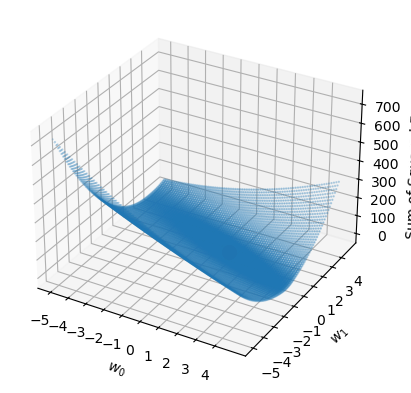

In [9]:
# Draw all attempted parameters and the corresponding errors.
# The larger the dot, the lower the error. And, the red dot is the final output.
full_log = np.asarray(full_log)
x_data = full_log[:, 0] # w_0
y_data = full_log[:, 1] # w_1
z_data = full_log[:, 2] # sum of squared errors
ax = plt.figure().add_subplot(projection='3d')
ax.scatter3D(x_data, y_data, z_data, s=100/(z_data+1), alpha=0.3)
ax.scatter3D(best_W[0], best_W[1], best_sum_sqr_err, s=100/(best_sum_sqr_err+1), color='red')
ax.set_xticks(np.arange(-5, 5, 1))
ax.set_yticks(np.arange(-5, 5, 1))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 8
})
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel(r'Sum of Squared Errors')

Please try the plotting in a Python console and play with the interactive figure. You will observe that the red dot is at the bottom of the scattered surface, and no other dots are lower than it. The surface, on the other hand, illustrates the subspace of candidates in which the search was conducted. It needs to be emphasized that when "*searching in a space*", not only the input domain, e.g. $\mathbb{R}^2$ in our example, participates in the meaning of "space", but also, and more importantly, the values of the objective function corresponding to the inputs.

The search above accessed every candidate pair of parameters in consideration, and finally found the best ones, $w_0=0.98$ and $w_1=0.98$, which are very close to the optimality. However, there are several critical issues:
- (1) The boundaries of the range for search are derived from a mere assumption. If we assumed the range to be, for example, $[10, 100]$, then it is certain that the optimality would be missed. In addition, theoretically, the range s.t. no missing happens should be $(-\infty, \infty) \subset \mathbb{R}$, and every value in the range is a candidate.
- (2) The choice of the search stride is rather haphazard. Small strides will significantly increase the workload of the search, while large strides may lead to the missing of good candidates.
- (3) The time complexity of the search is primarily affected by the number of candidates. And, thus, the search may not be efficient if the amount of candidates is too large.

An ideal search, therefore, should be performed on a subspace of candidates of a reasonable size. This is a general goal of designing algorithms to solve optimization problems.

### <a name="sec:solve_lls_by_gd">3.6 Solve Least Squares by Gradient Descent

The intuition of *gradient descent* is straightforward. Please imagine that the surface in the [Figure 3.5.1](#fig:3_5_1) is materialized in the real world. If we put a bead onto the surface, at any position except the red dot (i.e. the bottom point), with no push, and let it go freely, then naturally the bead will be <ins>**rolling downhill**</ins> and pass through the bottom. **Gradient descent** is an approach guiding the search of *local minima* (see CAUTION below) following such shortest paths. 

<ins>**CAUTION**</ins>: It is NOT true that gradient descent will always ends up with optimal solutions (i.e., global bottoms). Please check out the example in [Figure 3.5.2](#fig:3_5_2).

<a name="fig:3_5_2"> **Figure 3.5.2** Gradient Descent and local optimum.

<img src="gd_local.png" alt="drawing" width="400"/>


The essence of gradient descent is to express "rolling downhill" in math. We will first develop this idea on 1-D functions, and then generalize it to higher dimensional functions. If you are NOT yet familiar with the concept "*gradient*", please keep reading **INTERLUDE: Review of Gradient**. Otherwise, please feel free to jump to [Section 3.6.1](#sec:gd_on_1d_functions).

<ins>**INTERLUDE**</ins>: **Review of Gradient**

To make our exploration of gradient descent algorithms more intuitive, it is necessary to clearly explain what is "**gradient**", and why it is related to "rolling downhill". 

**Definition (Gradient):**

>The **gradient** of a function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is
>
>$$
    \nabla f(\boldsymbol{x}) = \begin{bmatrix} \frac{\partial f(\boldsymbol{x})}{\partial x_1} \\ \vdots \\ \frac{\partial f(\boldsymbol{x})}{\partial x_n} \end{bmatrix}
$$
>
>When $f$ is an univariate function, $\nabla f(x) = \frac{df(x)}{dx}$.

It is the transpose of the Jacobian of $f$, i.e., $\nabla f(\boldsymbol{x}) = \boldsymbol{J}^T f(\boldsymbol{x})$.

A critical fact about gradient is that the *opposite direction* of a gradient vector points to the steepest descent direction of $f$. Let's use a visual example, in [Figure 3.5.3](#fig:3_5_3), to demonstate gradients. ([Appendix A](#sec:appendix_a) gives a 3D plotting template.) The function in the example is a drop wave function:
$$
    f(x_1, x_2) = 2 - 5 \frac{\cos(\frac{1}{4} (x_1 ^ 2 + x_2 ^ 2))}{\sin(\frac{1}{4} (x_1 ^ 2 + x_2 ^ 2) + 3)}
$$
The partial derivative of $f$ w.r.t. $x_1$ is:
$$
    \frac{\partial f (x_1, x_2)}{\partial x_1} = \frac{10 x_1 \Big((x_1^2 + x_2^2 + 12) sin\big(\frac{1}{4}(x_1^2 + x_2^2)\big) + 4 cos\big(\frac{1}{4}(x_1^2 + x_2^2)\big)\Big)}{(x_1^2 + x_2^2 + 12)^2}
$$
Similarly, the partial derivative of $f$ w.r.t. $x_2$ is:
$$
    \frac{\partial f (x_1, x_2)}{\partial x_1} = \frac{10 x_2 \Big((x_1^2 + x_2^2 + 12) sin\big(\frac{1}{4}(x_1^2 + x_2^2)\big) + 4 cos\big(\frac{1}{4}(x_1^2 + x_2^2)\big)\Big)}{(x_1^2 + x_2^2 + 12)^2}
$$
Thus, at each input 2D point, $\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$, the gradient (which is a vector) $\begin{bmatrix} \frac{\partial f (x_1, x_2)}{\partial x_1} \\ \frac{\partial f (x_1, x_2)}{\partial x_2} \end{bmatrix}$ gives the direction of the steepest gradient *ascend* (i.e., the opposite direction points to the steepest gradient *descent*). And the length of the vector indicates the *change rate* of $f$ at this point.

<a name="fig:3_5_3"> **Figure 3.5.3** Gradient Vectors.

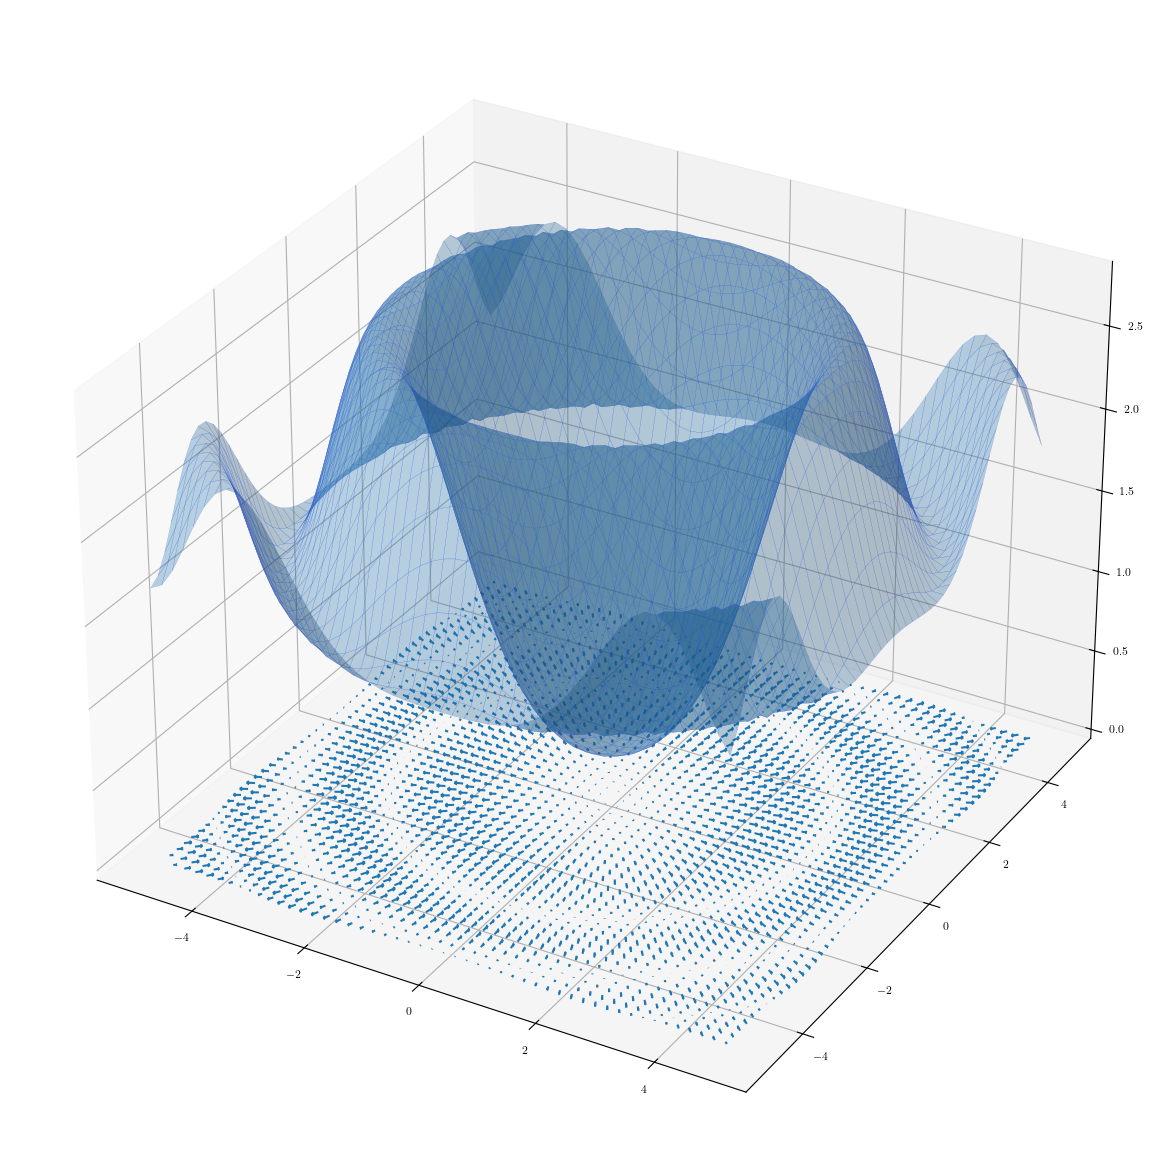

In [10]:
# You are highly encouraged to plot this figure in a Python console, and use the interactive UI to observe the surface and gradient vectors.
# The partial derivatives can be symbolically computed using https://www.wolframalpha.com/

# Define an interesting function f
def wave_func(x1, x2):
    f_x1_x2 = 2 - 5 * np.cos(0.25 * (x1**2 + x2**2)) / (0.25 * (x1**2 + x2**2) + 3)
    return f_x1_x2
# Partial derivatives of f.
def Dx1_wave_func(x1, x2):
    Df_x1_x2 = (10 * x1 * ((x1 ** 2 + x2 ** 2 + 12) * np.sin(0.25 * (x1 ** 2 + x2 ** 2)) + 4 * np.cos(0.25 * (x1 ** 2 + x2 ** 2)))) / ((x1 ** 2 + x2 ** 2 + 12) ** 2)
    return Df_x1_x2
def Dx2_wave_func(x1, x2):
    Df_x1_x2 = (10 * x2 * ((x1 ** 2 + x2 ** 2 + 12) * np.sin(0.25 * (x1 ** 2 + x2 ** 2)) + 4 * np.cos(0.25 * (x1 ** 2 + x2 ** 2)))) / ((x1 ** 2 + x2 ** 2 + 12) ** 2)
    return Df_x1_x2

X = np.arange(-5, 5, 0.2)
Y = np.arange(-5, 5, 0.2)
X_mesh, Y_mesh = np.meshgrid(X, Y)
Z_mesh = wave_func(X_mesh, Y_mesh)
ax = plt.figure(figsize=(15, 15)).add_subplot(projection='3d')
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, edgecolor='royalblue', lw=0.1, alpha=0.3)
# (u, v) gives the direction of gradient at a point.
U_mesh = Dx1_wave_func(X_mesh, Y_mesh)
V_mesh = Dx2_wave_func(X_mesh, Y_mesh)
# The gradient vectors are on the X-Y plane.
ax.quiver(X_mesh, Y_mesh, np.zeros(X_mesh.shape), U_mesh, V_mesh, np.zeros(X_mesh.shape), length=0.1, cmap='coolwarm')

#### <a name="sec:gd_on_1d_functions" />3.6.1 Gradient Descent on Univariate Functions

<ins>**NOTE**</ins>: To clearly explain how gradient descent works, simple problems that can be solved analytically will be used. But, instead of solving them analytically, we will use gradient descent. Please keep in mind that we focus on the gradient descent algorithm rather than the problems.

Let's consider a 1-D function: $f(x) = 2 (x - 3)^2 + 1$, where $x \in \mathbb{R}$. It is straightforward that the derivative is: $\frac{df(x)}{dx} = 4x - 12$. Our task is to find the minimum of $f(x)$ and the corresponding $x_m$, given an arbitrary starting point $x_0$. W.r.t. solving this particular problem, there is no major difficulty to obtain $x_m = 3$ (<ins>*Exercise*</ins>: Convince yourself that this is true, and [Figure 3.6.1](#fig:3_6_1) can help.).

Suppose our starting point is $x_0 = -5$. We want to express the next position the bead is rolling toward mathematically. By "position", it means an updated value of $x$ (e.g., the value of $x_1$ given $x_0$). To determine the new position, "*direction*" (i.e., where to move) and "*stride*" (i.e., how far to move) need to be determined. In addition, now that the search is iterative, it is also necessary to determine the "*terminal conditions*".

(1) **Direction**

We observed that, at any point $x_i$, if the derivative, $\frac{df(x_i)}{dx}$, is *positive*, then we should move to the *left*, i.e. toward $- \infty$ along the x-axis; otherwise, if $\frac{df(x_i)}{dx}$ is *negative*, then move to the *right*. For example, in the initial iteration, if we are at $x_0 = -5$, we should move to the right to approach $x_m$, and if we are at $x_0 = 8$, we should move to the left. Summarizing these observations, we propose that *when searching for minima on 1-D functions, at any given point $x_i$, the search will move toward the direction consistent with the sign of $- \frac{df(x_i)}{dx}$ along the x-axis*.

(2) **Stride**

The simplest choice of the stride is a constant, e.g., $1$. However, it may not be the best choice. In the task above, if the stride during the search keeps constant, then two cases can happen:
- (a) The stride is large, e.g., $5$. The search may easily miss the minimum point, i.e., $x_m = 3$.
- (b) The stride is small, e.g., $0.5$. The search would have to use a large number of iterations to approach the minimum point. 

Intuitively, the strides at places where the absolute values of derivatives are large should be greater than those with small absolute derivatives. Because the absolute derivative being large indicates that it is "far from" a bottom (may not be the global bottom), while smaller absolute derivatives indicate that it is getting closer to a bottom.

In practice, both constant and variable strides may be used. [TODO: Links to examles]

(3) **Terminal Conditions**

Terminal conditions specify when the search stops and returns. Two primary factors will be considered:
- (a) The quality of solution,
- (b) The running time of search.

W.r.t. the quality of solution, various criteria may be used depending on scenarios. Typically, an intuitive choice is "no further significant improvement" (i.e., if we keep proceeding with more iterations, no siginificant bettr solution will be obtained). W.r.t. the running time of search, a straightforward strategy is to terminate the search after a specific number of iterations. 

Pulling together these three ingredients, a gradient decent algorithm should follow this template:

> - Choose the initial point.
> - LOOP:
>     - Find the direction to move utilizing gradients.
>     - Update the stride if needed.
>     - Move to the next point.
>     - Terminate and return the final point if terminal conditions are satisfied.

<a name="fig:3_6_1" /> **Figure 3.6.1** The example univariate function and its derivative.

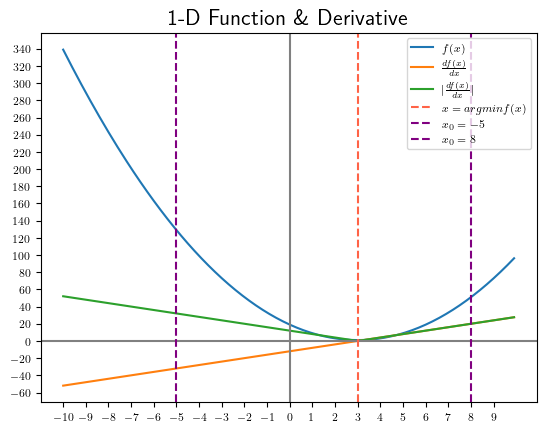

In [11]:
def test_func_1d(x):
    f_x = 2 * (x - 3) ** 2 + 1
    return f_x

xticks = np.arange(-10, 10, 0.1)
f_x = test_func_1d(xticks)
df_x = 4 * xticks - 12
abs_df_x = np.abs(df_x)

ax = plt.figure().add_subplot()
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 8,
    "axes.titlesize": 16
})

ax.plot(xticks, f_x, label=r'$f(x)$')
ax.plot(xticks, df_x, label=r'$\frac{df(x)}{dx}$')
ax.plot(xticks, abs_df_x, label=r'$|\frac{df(x)}{dx}|$')
ax.set_xticks(np.arange(-10, 10, 1))
ax.set_yticks(np.arange(-60, 360, 20))
ax.axhline(0, color='grey')
ax.axvline(0, color='grey')
ax.axvline(3, color='tomato', ls='--', label=r'$x=argmin f(x)$')
ax.axvline(-5, color='purple', ls='--', label=r'$x_0=-5$')
ax.axvline(8, color='purple', ls='--', label=r'$x_0=8$')
ax.set_title('1-D Function \& Derivative')
ax.legend()

Following the template of gradient descent, let's design a simple gradient descent algorithm specific to univariate functions. In this algorithm, we use a constant stride, search in a greed manner, and return when a turning of the function occurs or the max number of iterations is met.

<a name="alg:gd_1d">**Algorithm GD-1D**
>- **Given**:
>    - A differentiable function $f: \mathbb{R} \rightarrow \mathbb{R}$;
>    - A start point $x_0 \in \mathbb{R}$;
>    - A constant real number $s>0$ as the stride;
>    - A maximum number of iterations, $N_{max} > 0$.
>- **Seek**: $x_m \in \mathbb{R}$ s.t. $f(x_m) \leq f(x)$ for all $x \in \mathbb{R}$.
>- **Steps**:
>    - $x_m = x_0$
>    - $x_c = x_m$
>    - $N_{iter} = 0$
>    - LOOP:
>        - IF $\frac{df(x_c)}{dx} = 0$:
>            - $x_m = x_c$
>            - RETURN $x_m$ 
>        - $x_c = x_m - s \frac{\nabla f(x_c)}{|\nabla f(x_c)|}$
>        - IF $f(x_c) \leq f(x_m)$:
>            - $x_m = x_c$
>        - ELSE:
>            - RETURN $x_m$
>        - $N_{iter} = N_{iter} + 1$
>        - IF $N_{iter} >= N_{max}$:
>            - RETURN $x_m$

Next, we will implement this algorithm. 

In [12]:
# Approximating Gradients
def approx_grad_1d(func, x, h=0.01):
    grad = (func(x + h) - func(x - h)) / (2 * h)
    return grad

# Approximate gradients vs Accurate gradients
# We keep using 'test_func_1d()' defined above.
samples = np.arange(-5, 5, 0.1)
df_x = 4 * samples - 12
approx_df_x = approx_grad_1d(test_func_1d, samples)
abs_diff = np.abs(df_x - approx_df_x)

# We will observe that the differences between 'df_x' and 'approx_df_x' are almost trivial.
print('abs_diff =', np.round(abs_diff, decimals=4))

abs_diff = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


<ins>**BONUS**</ins>: Does gradient decent always result in the shortest path from the initial point to the local minima it finds? If not, when does it give the shortest path? For those sub-optimal paths, are the lengths of those paths bounded, in terms of both upper and lower bounds?

## <a name="sec:appendix_a" />Appendix A. Plot 3D Function Surface

X = [-5 -4 -3 -2 -1]
Y = [0 1 2 3 4]
X_mesh =
 [[-5 -4 -3 -2 -1]
 [-5 -4 -3 -2 -1]
 [-5 -4 -3 -2 -1]
 [-5 -4 -3 -2 -1]
 [-5 -4 -3 -2 -1]]
Y_mesh =
 [[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
Z_mesh =
 [[ 25  16   9   4   1]
 [ 24  15   8   3   0]
 [ 21  12   5   0  -3]
 [ 16   7   0  -5  -8]
 [  9   0  -7 -12 -15]]


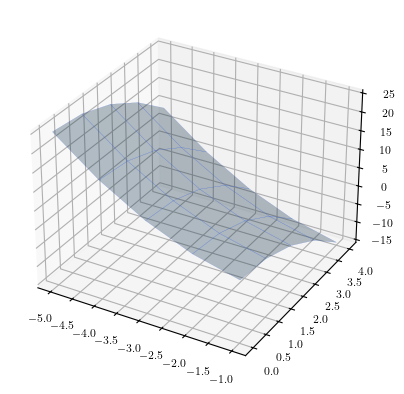

In [13]:
# Suppose X consists of N points.
X = np.arange(-5, 0, 1)
# Suppose Y consistes of M points.
Y = np.arange(0, 5, 1)
print('X =', X)
print('Y =', Y)
# 'np.meshgrid()' composes a NxM coordinate grid, i.e., NxM points on a plane. 'X_mesh' is a NxM 2D array. 'Y_mesh' is also a NxM 2D array. 
# Each element of 'X_mesh' gives the x coordinate of a point. Each element of 'Y_mesh' gives the y coordinate.
# The elements of 'X_mesh' and those of 'Y_mesh' are position-wise corresponding. That is why it is a coordinate grid.
X_mesh, Y_mesh = np.meshgrid(X, Y)
print('X_mesh =\n', X_mesh)
print('Y_mesh =\n', Y_mesh)
# 'Z_mesh' must be as well a NxM 2D array. Each element gives the z value of the corresponding point.
Z_mesh = X_mesh ** 2 - Y_mesh ** 2
print('Z_mesh =\n', Z_mesh)
# Plot the surface
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, edgecolor='royalblue', lw=0.1, alpha=0.3)